# LangChain: Memory

## Outline
* ConversationBufferMemory
* ConversationBufferWindowMemory
* ConversationTokenBufferMemory
* ConversationSummaryMemory

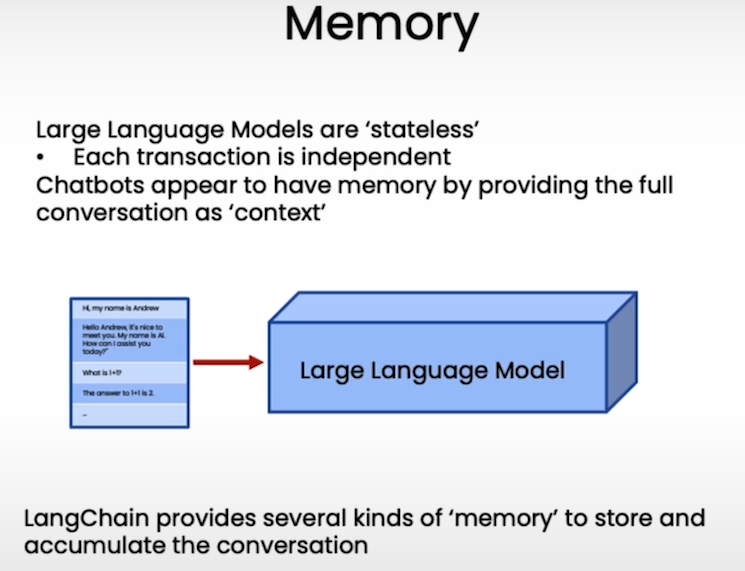

## ConversationBufferMemory

In [7]:
from langchain_openai import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

In [8]:
llm = ChatOpenAI(temperature=0.0, model="gpt-3.5-turbo")
memory = ConversationBufferMemory()
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [9]:
conversation.predict(input="Hi, my name is Fu Lim")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Fu Lim
AI:

> Finished chain.


"Hello Fu Lim! It's nice to meet you. How can I assist you today?"

In [10]:
conversation.predict(input="What is 1+1?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Fu Lim
AI: Hello Fu Lim! It's nice to meet you. How can I assist you today?
Human: What is 1+1?
AI:

> Finished chain.


'1+1 equals 2. Is there anything else you would like to know?'

In [11]:
conversation.predict(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Fu Lim
AI: Hello Fu Lim! It's nice to meet you. How can I assist you today?
Human: What is 1+1?
AI: 1+1 equals 2. Is there anything else you would like to know?
Human: What is my name?
AI:

> Finished chain.


'Your name is Fu Lim.'

In [12]:
print(memory.buffer)

Human: Hi, my name is Fu Lim
AI: Hello Fu Lim! It's nice to meet you. How can I assist you today?
Human: What is 1+1?
AI: 1+1 equals 2. Is there anything else you would like to know?
Human: What is my name?
AI: Your name is Fu Lim.


In [13]:
memory.load_memory_variables({})

{'history': "Human: Hi, my name is Fu Lim\nAI: Hello Fu Lim! It's nice to meet you. How can I assist you today?\nHuman: What is 1+1?\nAI: 1+1 equals 2. Is there anything else you would like to know?\nHuman: What is my name?\nAI: Your name is Fu Lim."}

In [14]:
memory = ConversationBufferMemory()

In [15]:
memory.save_context({"input": "Hi"}, 
                    {"output": "What's up"})

In [16]:
print(memory.buffer)

Human: Hi
AI: What's up


In [17]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up"}

In [18]:
memory.save_context({"input": "Not much, just hanging"}, 
                    {"output": "Cool"})

In [19]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up\nHuman: Not much, just hanging\nAI: Cool"}

## ConversationBufferWindowMemory

In [20]:
from langchain.memory import ConversationBufferWindowMemory

In [21]:
memory = ConversationBufferWindowMemory(k=1)               

In [22]:
memory.save_context({"input": "Hi"},
                    {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})


In [23]:
memory.load_memory_variables({})

{'history': 'Human: Not much, just hanging\nAI: Cool'}

In [24]:
llm = ChatOpenAI(temperature=0.0, model="gpt-3.5-turbo")
memory = ConversationBufferWindowMemory(k=1)
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [25]:
conversation.predict(input="Hi, my name is Fu Lim")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Fu Lim
AI:

> Finished chain.


"Hello Fu Lim! It's nice to meet you. How can I assist you today?"

In [26]:
conversation.predict(input="What is 1+1?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Fu Lim
AI: Hello Fu Lim! It's nice to meet you. How can I assist you today?
Human: What is 1+1?
AI:

> Finished chain.


'1+1 equals 2. Is there anything else you would like to know?'

In [27]:
conversation.predict(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: What is 1+1?
AI: 1+1 equals 2. Is there anything else you would like to know?
Human: What is my name?
AI:

> Finished chain.


"I'm sorry, I do not have access to personal information such as your name. Is there anything else you would like to ask?"

## ConversationTokenBufferMemory

In [ ]:
#!pip install tiktoken

In [28]:
from langchain.memory import ConversationTokenBufferMemory
from langchain_openai import OpenAI
llm = ChatOpenAI(temperature=0.0, model="gpt-3.5-turbo")

In [35]:
# Why need LLM, because different llm with different token
memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=30)
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"}, 
                    {"output": "Charming!"})

In [36]:
memory.load_memory_variables({})

{'history': 'AI: Beautiful!\nHuman: Chatbots are what?\nAI: Charming!'}

## ConversationSummaryMemory

In [37]:
from langchain.memory import ConversationSummaryBufferMemory

In [38]:
# create a long string
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."

memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100)
memory.save_context({"input": "Hello"}, {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory.save_context({"input": "What is on the schedule today?"}, 
                    {"output": f"{schedule}"})

In [39]:
memory.load_memory_variables({})

{'history': 'System: The human and AI exchange greetings and discuss the schedule for the day, including a meeting with the product team, work on the LangChain project, and a lunch meeting with a customer interested in AI. The AI provides details on each event and emphasizes the power of LangChain as a tool.'}

In [40]:
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [41]:
conversation.predict(input="What would be a good demo to show?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: The human and AI exchange greetings and discuss the schedule for the day, including a meeting with the product team, work on the LangChain project, and a lunch meeting with a customer interested in AI. The AI provides details on each event and emphasizes the power of LangChain as a tool.
Human: What would be a good demo to show?
AI:

> Finished chain.


'For the meeting with the product team, a demo showcasing the latest features and updates on the LangChain project would be ideal. This could include a live demonstration of how LangChain streamlines language translation processes, improves accuracy, and increases efficiency. Additionally, highlighting any recent success stories or case studies would help illustrate the impact of LangChain in real-world scenarios.'

In [42]:
memory.load_memory_variables({})

{'history': 'System: The human and AI exchange greetings and discuss the schedule for the day, including a meeting with the product team, work on the LangChain project, and a lunch meeting with a customer interested in AI. The AI provides details on each event and emphasizes the power of LangChain as a tool.\nHuman: What would be a good demo to show?\nAI: For the meeting with the product team, a demo showcasing the latest features and updates on the LangChain project would be ideal. This could include a live demonstration of how LangChain streamlines language translation processes, improves accuracy, and increases efficiency. Additionally, highlighting any recent success stories or case studies would help illustrate the impact of LangChain in real-world scenarios.'}

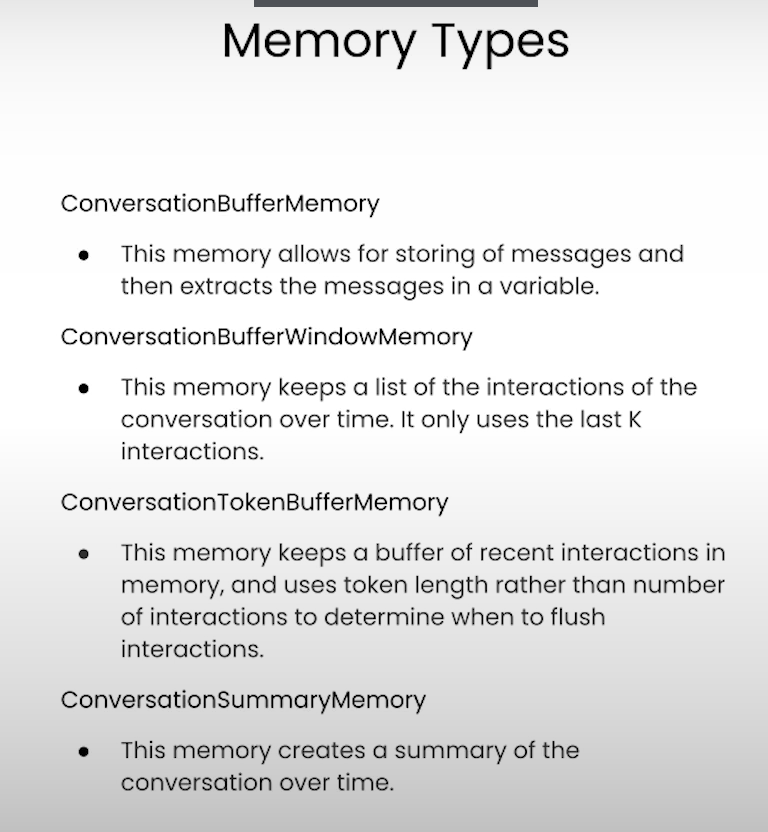

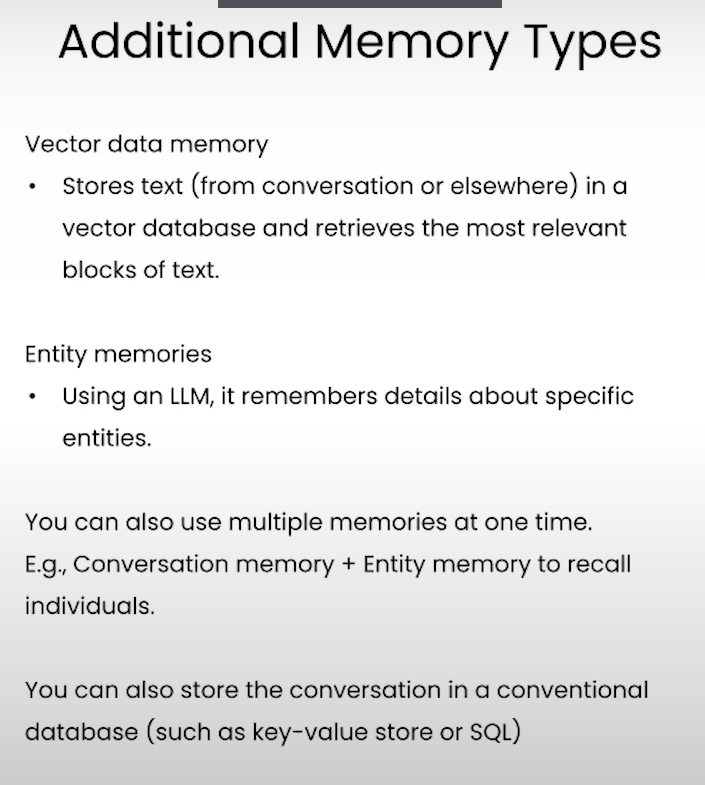